<a href="https://colab.research.google.com/github/bmshahrier/bixi-montreal/blob/master/bixi_montreal_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIXI Montreal Exploratory Data Analysis

In [0]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import datetime

# the more advanced python visualization library
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Load csv Datafile from Google Drive

In [2]:
# Make connection with Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# Get access the GDrive
!ls -la /content/gdrive/My\ Drive/Colab\ Notebooks/

total 297
drwx------ 2 root root   4096 Jun  9 13:45 bixi-montreal
-rw------- 1 root root  95927 Jun 12 09:51 bixi-montreal-classification-model.ipynb
-rw------- 1 root root  89305 Jul  1 21:08 bixi-montreal-data-wrangling.ipynb
-rw------- 1 root root   1283 Jul  3 00:58 bixi-montreal-exploratory-data-analysis.ipynb
-rw------- 1 root root 107276 Jun 15 03:53 bixi-montreal-regression-model.ipynb
-rw------- 1 root root   4455 Jun  8 03:41 Untitled0.ipynb


In [5]:
# Explore the contents of GDrive
!ls -la /content/gdrive/My\ Drive/Colab\ Notebooks/bixi-montreal/processed-data

total 2703427
-rw------- 1 root root      62283 Jun 15 03:30 bixi-bike-moveout-hourly.csv
-rw------- 1 root root     159958 Jun 30 21:55 bixi_stations_2014_2018.csv
-rw------- 1 root root 1035802802 Jun 30 21:55 bixi_trip_2014_2018.csv
-rw------- 1 root root   72869236 Jun 15 03:36 bixi-trip-groupby-data-2018.csv
-rw------- 1 root root   21085242 Jun  6 02:32 bixi-trip-weather-data-2018-04.csv
-rw------- 1 root root  584134502 Jun 15 03:36 bixi-trip-weather-data-2018.csv
-rw------- 1 root root 1050229678 Jul  1 21:03 bixi-trip-weather-data-hourly-2014-2018.csv
-rw------- 1 root root     142485 Jun 30 21:55 mtl_weather_daily_2014_2018.csv
-rw------- 1 root root    3820835 Jun 30 21:55 mtl_weather_hourly_2014_2018.csv


In [6]:
# Load Station csv file to pandas DataFrame

df_bixi = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/bixi-montreal/processed-data/bixi-trip-weather-data-hourly-2014-2018.csv', error_bad_lines=False)
df_bixi.head()

,Station_Code,Station_Name,Latitude,Longitude,Year,Month,Day,Week_Day,Hour,Bike_Move_Out,Bike_Move_In,Temp_(°C),Dew_Point_Temp_(°C),Rel_Hum_(%),Wind_Dir_(10s_deg),Wind_Spd_(km/h),Visibility_(km),Stn_Press_(kPa),Wind_Chill,Weather
0,6062,Drummond / Ste-Catherine,45.50,-73.57,2014,4,15,1,0,1,0,13.90,13.00,94.00,20.00,10.00,16.10,99.91,-4.00,Rain Showers
1,6064,de Maisonneuve / Stanley,45.50,-73.58,2014,4,15,1,0,1,0,13.90,13.00,94.00,20.00,10.00,16.10,99.91,-4.00,Rain Showers
2,6068,Mansfield / Sherbrooke,45.50,-73.58,2014,4,15,1,0,1,1,13.90,13.00,94.00,20.00,10.00,16.10,99.91,-4.00,Rain Showers
3,6082,6e avenue / Rosemont,45.55,-73.58,2014,4,15,1,0,0,1,13.90,13.00,94.00,20.00,10.00,16.10,99.91,-4.00,Rain Showers
4,6093,Atwater / Sherbrooke,45.49,-73.59,2014,4,15,1,0,0,1,13.90,13.00,94.00,20.00,10.00,16.10,99.91,-4.00,Rain Showers


# Summarizing Data for Inspection

In [7]:
# Summarizing BIXI Data

print(df_bixi.shape)
print(df_bixi.columns)
print(df_bixi.head())
print(df_bixi.describe())

(8089071, 20)
Index(['Station_Code', 'Station_Name', 'Latitude', 'Longitude', 'Year',
       'Month', 'Day', 'Week_Day', 'Hour', 'Bike_Move_Out', 'Bike_Move_In',
       'Temp_(°C)', 'Dew_Point_Temp_(°C)', 'Rel_Hum_(%)', 'Wind_Dir_(10s_deg)',
       'Wind_Spd_(km/h)', 'Visibility_(km)', 'Stn_Press_(kPa)', 'Wind_Chill',
       'Weather'],
      dtype='object')
   Station_Code              Station_Name  ...  Wind_Chill       Weather
0          6062  Drummond / Ste-Catherine  ...       -4.00  Rain Showers
1          6064  de Maisonneuve / Stanley  ...       -4.00  Rain Showers
2          6068    Mansfield / Sherbrooke  ...       -4.00  Rain Showers
3          6082      6e avenue / Rosemont  ...       -4.00  Rain Showers
4          6093      Atwater / Sherbrooke  ...       -4.00  Rain Showers

[5 rows x 20 columns]
       Station_Code   Latitude  ...  Stn_Press_(kPa)  Wind_Chill
count    8089071.00 8068259.00  ...       8089071.00  8089071.00
mean        6335.08      45.52  ...           10

# Data Perspective

In [15]:
# Total number of Trips by Year
df_bixi.groupby(by='Year')['Bike_Move_Out'].sum()

Year
2014    3136276
2015    3443883
2016    4000080
2017    4740357
2018    5277541
Name: Bike_Move_Out, dtype: int64

In [23]:
# Total number of Trips by Year and Months
df_bixi.groupby(by=['Year', 'Month'])['Bike_Move_Out'].sum()

Year  Month
2014  4        108264
      5        455261
      6        525863
      7        569352
      8        556780
      9        477545
      10       331818
      11       111393
2015  4        150271
      5        545678
      6        547238
      7        620865
      8        597505
      9        523322
      10       332597
      11       126407
2016  4        194514
      5        573739
      6        645448
      7        716335
      8        688174
      9        632218
      10       397707
      11       151945
2017  4        196327
      5        589852
      6        748078
      7        877338
      8        859471
      9        747633
      10       569930
      11       151728
2018  4        236982
      5        811910
      6        888470
      7        953031
      8        956790
      9        797520
      10       488490
      11       144348
Name: Bike_Move_Out, dtype: int64

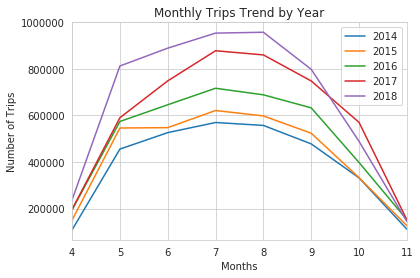

In [52]:
# Monthly Trips Trend by Year
years = [2014, 2015, 2016, 2017, 2018]
for year in years:
  df_bixi.loc[df_bixi['Year'] == year].groupby(by=['Month'])['Bike_Move_Out'].sum().plot(kind='line')
  plt.legend([2014, 2015, 2016, 2017, 2018])
plt.title('Monthly Trips Trend by Year')
plt.xlabel('Months')
plt.ylabel('Number of Trips')
plt.show()
